# Gait Analysis
### In this project we are preparing a model which takes a sequence of gait walking style and predict as to who is in the picture. We do this using GET(Gait Energy ..) and then we try out some classifier to check the perfomance.

### Importing Statements
Import the important packages


In [24]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from skimage import io
import scipy.misc
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn.svm import LinearSVC
import time
from sklearn.utils import shuffle
import sys
##scipy.misc.imsave('outfile.jpg', image_array)

In [2]:
new_folder ="F:\Depth_Cropped"##Where the sequence of images are present
data ="E:\Depth_Cropped"## where the GET is to be stored


In [17]:
##Creating a mirror image of the image
from PIL import Image

def flip_image(image_path, saved_location):

    """

    Flip or mirror the image

    @param image_path: The path to the image to edit

    @param saved_location: Path to save the cropped image

    """

    image_obj = Image.open(image_path)

    rotated_image = image_obj.transpose(Image.FLIP_LEFT_RIGHT)

    rotated_image.save(saved_location)

    

### Creating GET out of the Sequences

In [50]:
##Making GET 
def CreateGEt(Making_GET=False):
    if (not os.path.isdir(data)):
        os.mkdir(data)
    if(Making_GET):
        for person in os.listdir(new_folder):    
            os.mkdir(os.path.join(data,person))
            for normalfol in os.listdir(os.path.join(new_folder,person)):
                if normalfol[0]=='n':
                    count=0
                    total=np.zeros((250,200))
                    for file in os.listdir(os.path.join(new_folder,person,normalfol)):

                        count+=1
                        if(file[-3:]=="png"):

                            filename= os.path.join(new_folder,person,normalfol,file)
                            image = np.array(plt.imread(fname=filename))
                            image=np.where(image<0.2,0,1)
                            total+=image
                    total/=count


                    os.mkdir(os.path.join(data,person,normalfol))
                    plt.imsave(fname=os.path.join(data,person,normalfol,normalfol+".png"),arr=total,cmap="gray")
                    ##total.save(os.path.join(data,person,normalfol,normalfol+".jpeg"))



    print ("The GET is stored in "+data+"\nYou are ready to go")






In [54]:
#Some images are flipped in oposite direction so to make them point in one direction this processing is done
def FlippingLEftIMtoRigh(want=False):
    if(want):
        for person in os.listdir(data):    
                for normalfol in os.listdir(os.path.join(data,person)):
                     if(int(normalfol[1:])%2==0):

                        for file in os.listdir(os.path.join(data,person,normalfol)):
                            filename= os.path.join(data,person,normalfol,file)
                            flip_image(filename,filename)





In [53]:
CreateGEt()
FlippingLEftIMtoRigh()

The GET is stored in E:\Depth_Cropped
You are ready to go


### Loading the GET Images and using them for processing

In [4]:
##Loading the GET image into database 
##Takes around 21 seconds
tic =time.time()
X_train =[]
X_test=[]
y_train =[]
y_test=[]
for person in os.listdir(data):
    label = int(person[1:])
    i=0
    for nfol in os.listdir(os.path.join(data,person)):
        count = len([name for name in os.listdir(os.path.join(data,person)) ])
        
        if count > 10 :
            testnumber =4
        elif count >7 :
            testnumber =3
        else :
            testnumber =2
        filename= os.path.join(data,person,nfol,nfol)+".jpeg"
        image = np.array(plt.imread(fname=filename))
        if(i<testnumber):
            X_test.append(image)
            y_test.append(label)
        else :
            X_train.append(image)
            y_train.append(label)
        i+=1
X_test=np.array(X_test)
X_train=np.array(X_train)
y_train=np.array(y_train)
y_test=np.array(y_test)
toc =time.time()
print("Loading data took time: "+str((toc-tic))+" sec")

Loading data took time: 21.311508655548096 sec


In [5]:
print("X_train.shape: {}, y_train.shape: {}".format(X_train.shape, y_train.shape))
print("X_test.shape: {}, y_test.shape: {}".format(X_test.shape, y_test.shape))

X_train.shape: (1348, 250, 200), y_train.shape: (1348,)
X_test.shape: (674, 250, 200), y_test.shape: (674,)


## Know what  your data looks like


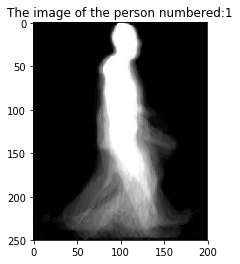

In [6]:
##Example of an GET
plt.imshow(X_train[0],cmap="gray")
plt.title("The image of the person numbered:"+str(y_train[0]))
plt.show()

In [10]:
##Flatten the dataset
X_train=X_train.reshape((X_train.shape[0],250*200))
X_test=X_test.reshape(X_test.shape[0],250*200)

In [11]:
##Randomizing the dataset
X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

In [12]:
y_train[0:10]

array([206,  20,  12, 112, 276, 134, 304, 290,  75,  84])

In [13]:
##Dimension Reduction
##Here it takes around 30 sec
tic=time.time()
pca=PCA(n_components=0.99)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
toc=time.time()
print("Dimensionality reduced to:", pca.n_components_)
print("Time taken to reduce the size of the data : "+str((toc-tic))+" sec")

Dimensionality reduced to: 432
Time taken to reduce the size of the data : 24.231295585632324 sec


In [ ]:
##using the classifier
##1.) Decision Tree Classifier
check=[2,5,10,50,100,150,500]
for i in check:
    from sklearn.tree import DecisionTreeClassifier
    clf1 = DecisionTreeClassifier(random_state=0,min_samples_split=i)
    %time clf1.fit(X_train_pca,y_train)
    print("Training accuracy : {:.4f}, \nTest Accuracy: {:.4f}".format(clf1.score(X_train_pca,y_train),clf1.score(X_test_pca,y_test)))
    print("min samples split is "+ str(i))
    print("------------------------------------------------------------")

We cant choose the decision Tree Classifier for this job since its been giving a bad accuracy.
We must try someother classifier for this. Lets try logistic Regression

In [ ]:
##time to check other classifier out
clf2 = LogisticRegression(C=.00001,solver='liblinear',multi_class='auto')
%time clf2 = clf2.fit(X_train_pca, y_train)

print("Training accuracy : {:.4f}, \nTest Accuracy: {:.4f}".format(clf2.score(X_train_pca,y_train),clf2.score(X_test_pca,y_test)))
print("min samples split is "+ str(i))
print("------------------------------------------------------------")

In [ ]:
for i in [1,0.8,0.3,0.1,0.03,0.001,0.0001]:
    svm = LinearSVC(C=i)
    %time svm = svm.fit(X_train_pca, y_train)
    print("Training accuracy : {:.4f}, \nTest Accuracy: {:.4f}".format(clf2.score(X_train_pca,y_train),clf2.score(X_test_pca,y_test)))
    print ("C chosen is "+str(i))
    print ("-----------------------------------------------------------------------")


In [55]:
clf = LogisticRegression(C=.01,solver ='lbfgs',multi_class='auto',max_iter=250)
%time clf = clf.fit(X_train_pca, y_train)
y_train_pred=clf.predict(X_train_pca)
y_test_pred=clf.predict(X_test_pca)
print("Training accuracy: {:.4f}, Test Accuracy: {:.4f}".format(accuracy_score(y_train_pred, y_train), accuracy_score(y_test_pred, y_test)))

Wall time: 8.65 s
Training accuracy: 1.0000, Test Accuracy: 0.9525


## We check out the predictions against the real values of the test set 

In [15]:
def plot_gallery(images, titles, rows=3, cols=4):
    plt.figure()
    for i in range(rows * cols):
        fig = plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())
    plt.tight_layout()
    plt.show()
        
def titles(y_pred, y_test):
    for i in range(y_pred.shape[0]):
        yield 'predicted: {0}\ntrue: {1}'.format(y_pred[i], y_test[i])

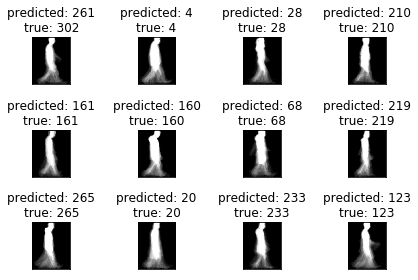

In [16]:
prediction_titles = list(titles(clf.predict(X_test_pca), y_test))
plot_gallery(X_test.reshape(-1, 250, 200), prediction_titles)

## Hence we choose logistic regression as our classifier giving us the accuracy of 95%